In [65]:
import torch
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample, save_as_images)
import matplotlib.pyplot as plt
import numpy as np

In [66]:
#load model
model = BigGAN.from_pretrained('biggan-deep-256')

In [67]:
#generate z
truncation = 0.4
bs = 1
class_vector = one_hot_from_names(['coffee'], batch_size=bs)
noise_vector = truncated_noise_sample(truncation = truncation, batch_size = bs)

In [68]:
noise_vector = torch.from_numpy(noise_vector)
class_vector = torch.from_numpy(class_vector)

In [69]:
# GPU
noise_vec = noise_vector.to('cuda')
class_vec = class_vector.to('cuda')
model.to('cuda')

BigGAN(
  (embeddings): Linear(in_features=1000, out_features=128, bias=False)
  (generator): Generator(
    (gen_z): Linear(in_features=256, out_features=32768, bias=True)
    (layers): ModuleList(
      (0): GenBlock(
        (bn_0): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=2048, bias=False)
          (offset): Linear(in_features=256, out_features=2048, bias=False)
        )
        (conv_0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
        (bn_1): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_2): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_2): Conv2d(512, 512, kernel_size=(3, 

In [70]:
with torch.no_grad():
    output = model(noise_vec, class_vec, truncation)

In [71]:
# to CPU
output = output.to('cpu')

In [72]:
output[0].shape

torch.Size([3, 256, 256])

In [73]:
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


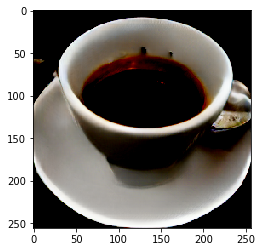

In [74]:
plt.imshow(np.transpose(output[0].numpy(), (1,2,0)))

In [76]:
#Saves to local directory in as output_#.png
save_as_images(output)